<a href="https://colab.research.google.com/github/DimeMauro/Amigo-Secreto-Mauricio-Tobar/blob/main/PortafolioTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()


Saving TelecomX_Data.json to TelecomX_Data.json


In [4]:
import json


In [7]:
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)


In [9]:
import json
import pandas as pd

# Cargar el archivo JSON
with open('TelecomX_Data.json', 'r') as file:
    data = json.load(file)

# Convertir a DataFrame (cada fila representa un cliente)
df = pd.json_normalize(data)

# Mostrar las primeras filas
print(df.head())

# Ver columnas y tipos de datos
print(df.dtypes)


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [10]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [11]:
# Seleccionar variables posiblemente relevantes
relevant_columns = [
    'Churn',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Verificar si todas existen
print(set(relevant_columns).intersection(df.columns))


{'customer.tenure', 'internet.InternetService', 'customer.Partner', 'internet.OnlineSecurity', 'account.Charges.Monthly', 'customer.SeniorCitizen', 'account.Charges.Total', 'account.Contract', 'Churn', 'account.PaymentMethod', 'phone.PhoneService', 'phone.MultipleLines', 'account.PaperlessBilling', 'customer.Dependents', 'internet.TechSupport'}


In [12]:
# 1. Valores ausentes
missing_values = df.isnull().sum()
print("🔎 Valores ausentes por columna:\n", missing_values[missing_values > 0])

# 2. Filas duplicadas
duplicate_rows = df.duplicated().sum()
print(f"\n🔁 Filas duplicadas: {duplicate_rows}")

# 3. Errores de formato (ej. tipo incorrecto en 'Charges.Total')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

charges_format_errors = df[['account.Charges.Monthly', 'account.Charges.Total']].isnull().sum()
print("\n💵 Errores en formato de columnas numéricas:\n", charges_format_errors)

# 4. Inconsistencias en la columna 'Churn'
print("\n📌 Valores únicos en 'Churn':", df['Churn'].unique())

# Tip: Si hay espacios, valores vacíos o nulos en 'Churn', podrías limpiarlos así:
df['Churn'] = df['Churn'].str.strip().replace('', pd.NA)

# 5. Revisar columnas categóricas clave para detectar inconsistencias
categorical_cols = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

print("\n🔠 Valores únicos en columnas categóricas relevantes:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].dropna().unique()}")


🔎 Valores ausentes por columna:
 Series([], dtype: int64)

🔁 Filas duplicadas: 0

💵 Errores en formato de columnas numéricas:
 account.Charges.Monthly     0
account.Charges.Total      11
dtype: int64

📌 Valores únicos en 'Churn': ['No' 'Yes' '']

🔠 Valores únicos en columnas categóricas relevantes:
Churn: ['No' 'Yes']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [13]:
# ====================
# 🔁 Eliminar duplicados
# ====================
df.drop_duplicates(inplace=True)

# ====================
# 💵 Corregir tipo numérico
# ====================
for col in ['account.Charges.Monthly', 'account.Charges.Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ====================
# 🧼 Limpiar valores categóricos
# ====================
# Strip y reemplazo de vacíos en columnas categóricas clave
categorical_cols = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.Contract',
    'account.PaperlessBilling', 'account.PaymentMethod'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace('', pd.NA)

# ====================
# 📌 Establecer categorías válidas para 'Churn'
# ====================
df['Churn'] = df['Churn'].replace({'nan': pd.NA}).dropna()
df = df[df['Churn'].isin(['Yes', 'No'])]  # Eliminar valores inválidos

# ====================
# 🧹 Eliminar filas con valores numéricos faltantes importantes
# ====================
df.dropna(subset=['account.Charges.Monthly', 'account.Charges.Total'], inplace=True)

# ====================
# ✅ Resultado final
# ====================
print("✔️ Dataset limpio. Tamaño final:", df.shape)
print("📊 Distribución de 'Churn':\n", df['Churn'].value_counts())

✔️ Dataset limpio. Tamaño final: (7032, 21)
📊 Distribución de 'Churn':
 Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [14]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Verifica el resultado
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [15]:
# 1. Convertir "Yes"/"No" a binario (1/0)
yes_no_cols = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# 2. Convertir 'Churn' a variable binaria (objetivo)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Renombrar columnas para facilitar la lectura
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Ciudadano_Senior',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Meses_Tenencia',
    'phone.PhoneService': 'Tiene_Telefono',
    'phone.MultipleLines': 'Lineas_Multiples',
    'internet.InternetService': 'Tipo_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}, inplace=True)

# 4. Verificar transformación
print(df[['Churn', 'Tiene_Pareja', 'Tiene_Telefono', 'Facturacion_Sin_Papel', 'Genero']].head())

   Churn  Tiene_Pareja  Tiene_Telefono  Facturacion_Sin_Papel  Genero
0    NaN             1               1                      1  Female
1    NaN             0               1                      0    Male
2    NaN             0               1                      1    Male
3    NaN             1               1                      1    Male
4    NaN             1               1                      1  Female


In [16]:
# Análisis estadístico descriptivo general
descripcion = df.describe().T  # Transpuesta para mejor legibilidad

# Agregar mediana manualmente
descripcion['mediana'] = df.median(numeric_only=True)

# Mostrar resumen
print(descripcion)

                         count         mean          std        min  \
Churn                      0.0          NaN          NaN        NaN   
Ciudadano_Senior        7032.0     0.162400     0.368844   0.000000   
Tiene_Pareja            7032.0     0.482509     0.499729   0.000000   
Tiene_Dependientes      7032.0     0.298493     0.457629   0.000000   
Meses_Tenencia          7032.0    32.421786    24.545260   1.000000   
Tiene_Telefono          7032.0     0.903299     0.295571   0.000000   
Lineas_Multiples        6352.0     0.467097     0.498955   0.000000   
Seguridad_Online        5512.0     0.365566     0.481632   0.000000   
Respaldo_Online         5512.0     0.439949     0.496426   0.000000   
Proteccion_Dispositivo  5512.0     0.438679     0.496271   0.000000   
Soporte_Tecnico         5512.0     0.370102     0.482875   0.000000   
TV_Streaming            5512.0     0.490385     0.499953   0.000000   
Peliculas_Streaming     5512.0     0.495464     0.500025   0.000000   
Factur

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-9fd34fa7f660>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=['#4CAF50', '#F44336'])
<ipython-input-18-9fd34fa7f660>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.countplot(x='Churn', data=df, palette=['#4CAF50', '#F44336'])


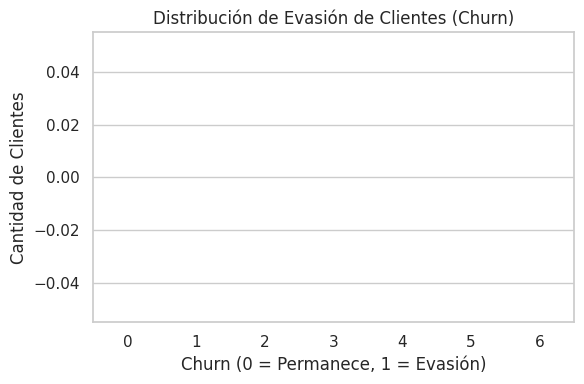

In [18]:
# Estilo general
sns.set(style='whitegrid')

# Figura
plt.figure(figsize=(6, 4))

# Gráfico de barras
ax = sns.countplot(x='Churn', data=df, palette=['#4CAF50', '#F44336'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Churn (0 = Permanece, 1 = Evasión)')
plt.ylabel('Cantidad de Clientes')

# Etiquetas de barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()